<a href="https://colab.research.google.com/github/GammaPerez/IA-Class/blob/main/Salud/colab/calIMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
peso_altura = np.array([[54,1.57],[56,1.58],[57,1.59],[56,1.6],[54,1.61],[60,1.62],[62,1.63],[45,1.64],[56,1.65],[56,1.66],[60,1.67],[60,1.68],[61,1.69],[64,1.7],[64,1.71]], dtype=float)
IMC = np.array ([[21.91],[22.43],[22.55],[21.88],[20.83],[22.86],[23.34],[16.73],[20.57],[20.32],[21.51],[21.26],[21.36],[22.15],[21.89]], dtype=float)

In [ ]:
oculta1 = tf.keras.layers.Dense(units=2, input_shape=[2])
oculta2 = tf.keras.layers.Dense(units=2)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("comenzando entrenamiento...")
historial=modelo.fit(peso_altura, IMC, epochs=1000, verbose=False)
print("modelo entrenado!!!")

comenzando entrenamiento...
modelo entrenado!!!


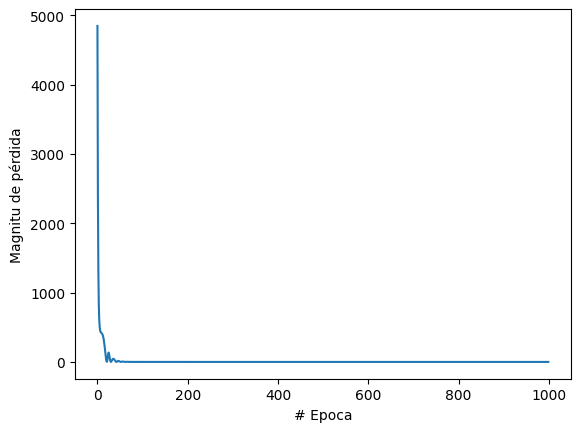

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitu de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Realizar una predicción!!!")
medidas_peso_altura = np.array([[40,1.57]], dtype=float)
resultado = modelo.predict(medidas_peso_altura)
print("El resultado es"+str(resultado)+"kg/(m^2)")

Realizar una predicción!!!
1/1 [==============================] - 0s 130ms/step
El resultado es[[16.332052]]kg/(m^2)


In [ ]:
modelo.save('calculo_imc.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls

calculo_imc.h5	indicemc  sample_data


In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir indicemc

mkdir: cannot create directory ‘indicemc’: File exists


In [ ]:
!tensorflowjs_converter --input_format keras calculo_imc.h5 indicemc

2023-12-05 04:41:34.707334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 04:41:34.707399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 04:41:34.708708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 04:41:36.162011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!ls indicemc

group1-shard1of1.bin  model.json
